In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D,Flatten
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.datasets import mnist
from keras.utils import  to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#데이터를 불러옵니다.
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
#컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),
                 activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


In [4]:
#모델의 실행 옵션을 설정
model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [5]:
#모델 최적화를 위한 설정 구간입니다.
modelpath = '../data/MNIST_CNN.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath,monitor='val_loss',
                               verbose=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

In [ ]:
#모델을 실행합니다
history = model.fit(X_train,y_train,validation_split=0.25,epochs=30,
                    batch_size=200,verbose=0,callbacks=[early_stopping_callback,checkpointer])


In [6]:
#테스트 정확도를 출력합니다.
print('\n Test Accuracy: %.4f'%(model.evaluate(X_test,y_test)[1]))


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [37]:
#검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']


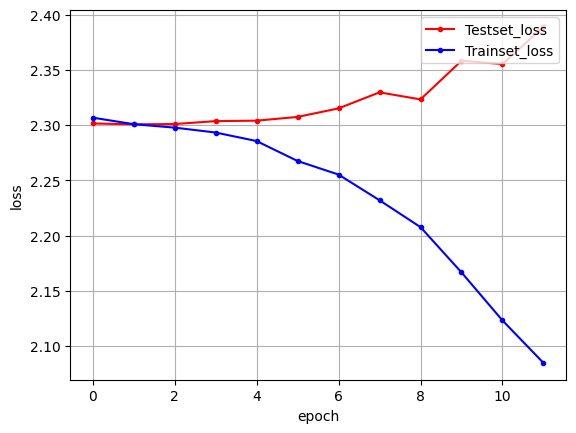

In [30]:
#그래프로 표현합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')

#그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()